In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bollywood-age/trainimgs/middle/16916.jpg
/kaggle/input/bollywood-age/trainimgs/middle/22706.jpg
/kaggle/input/bollywood-age/trainimgs/middle/12666.jpg
/kaggle/input/bollywood-age/trainimgs/middle/20088.jpg
/kaggle/input/bollywood-age/trainimgs/middle/6234.jpg
/kaggle/input/bollywood-age/trainimgs/middle/1269.jpg
/kaggle/input/bollywood-age/trainimgs/middle/22288.jpg
/kaggle/input/bollywood-age/trainimgs/middle/24819.jpg
/kaggle/input/bollywood-age/trainimgs/middle/3863.jpg
/kaggle/input/bollywood-age/trainimgs/middle/6241.jpg
/kaggle/input/bollywood-age/trainimgs/middle/623.jpg
/kaggle/input/bollywood-age/trainimgs/middle/2193.jpg
/kaggle/input/bollywood-age/trainimgs/middle/14143.jpg
/kaggle/input/bollywood-age/trainimgs/middle/11925.jpg
/kaggle/input/bollywood-age/trainimgs/middle/21440.jpg
/kaggle/input/bollywood-age/trainimgs/middle/3750.jpg
/kaggle/input/bollywood-age/trainimgs/middle/11378.jpg
/kaggle/input/bollywood-age/trainimgs/middle/17338.jpg
/kaggle/input/boll

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input,Dense,Conv2D,BatchNormalization,Dropout,GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator as imdg
import os
from PIL import Image
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
path='/kaggle/input/bollywood-age/trainimgs'

In [10]:
imdgen = imdg(
    rescale=1./255,
    validation_split=0.05,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
data_train=imdgen.flow_from_directory(path,target_size=(224, 224),subset='training')
data_val=imdgen.flow_from_directory(path,target_size=(224, 224),subset='validation')

Found 18912 images belonging to 3 classes.
Found 994 images belonging to 3 classes.


224


/opt/conda/lib/python3.10/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


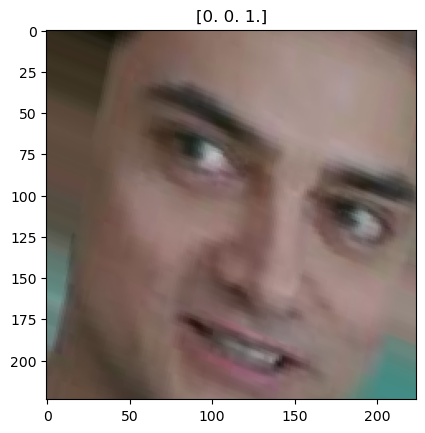

In [18]:
i=0
while i<1:
    i+=1
    batch=next(data_train)
    print(len(batch[0][5]))
    img,label=batch[0][5],batch[1][5]
    plt.imshow(img)
    plt.title(label)

In [12]:
base=tf.keras.applications.vgg16.VGG16(
    input_shape=(224,224,3),
    include_top=False,
    weights="imagenet",
)
base.trainable=False

58889256/58889256 [==============================] - 0s 0us/step


In [13]:
inputs = Input(shape=(224,224,3))
x = base(inputs, training=False)
x=BatchNormalization()(x)
x = GlobalAveragePooling2D()(x)
x= Dropout(0.3)(x)
predictions = Dense(3,activation='softmax')(x)

model=keras.Model(inputs,predictions)

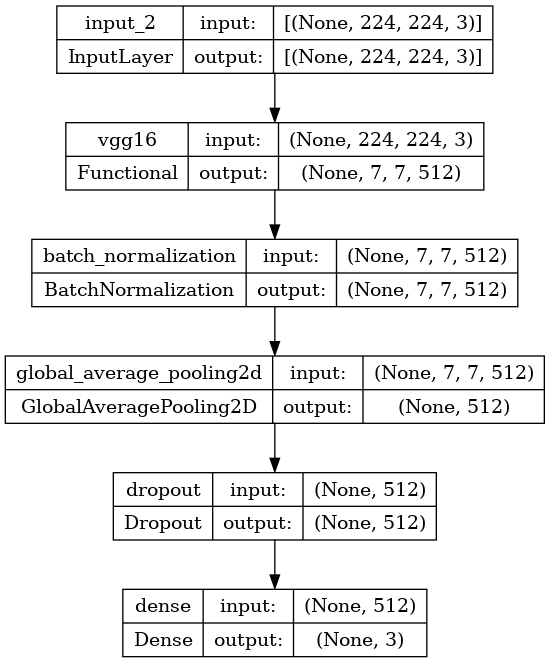

In [14]:
keras.utils.plot_model(model,show_shapes=True)

In [15]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),  # Adjust the learning rate as needed
    loss='categorical_crossentropy',
    metrics=["accuracy"]
)

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 512)        2048      
 ormalization)                                                   
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 3)                 1539  

In [17]:
history=model.fit(data_train,batch_size=32,epochs=50,validation_data=data_val,callbacks=[tf.keras.callbacks.EarlyStopping(min_delta=0.001,patience=3,restore_best_weights=True)])

Epoch 1/50
591/591 [==============================] - 318s 523ms/step - loss: 0.9917 - accuracy: 0.5176 - val_loss: 0.8974 - val_accuracy: 0.6066
Epoch 2/50
591/591 [==============================] - 236s 400ms/step - loss: 0.9094 - accuracy: 0.5780 - val_loss: 15.3680 - val_accuracy: 0.6036
Epoch 3/50
591/591 [==============================] - 237s 401ms/step - loss: 0.8859 - accuracy: 0.5904 - val_loss: 1.6082 - val_accuracy: 0.6177
Epoch 4/50
591/591 [==============================] - 243s 411ms/step - loss: 0.8725 - accuracy: 0.6032 - val_loss: 6.0849 - val_accuracy: 0.6268


In [11]:
model.trainable=True
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 512)        2048      
 ormalization)                                                   
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 3)                 1539  

In [12]:
history=model.fit(data_val,batch_size=32,epochs=10,callbacks=[tf.keras.callbacks.EarlyStopping(min_delta=1e-5,patience=3,restore_best_weights=True)])

Epoch 1/10
32/32 [==============================] - 13s 410ms/step - loss: 0.9088 - accuracy: 0.5915
Epoch 2/10
32/32 [==============================] - 12s 378ms/step - loss: 0.9118 - accuracy: 0.5825
Epoch 3/10
32/32 [==============================] - 13s 391ms/step - loss: 0.9027 - accuracy: 0.5885
Epoch 4/10
32/32 [==============================] - 12s 363ms/step - loss: 0.9024 - accuracy: 0.5795
Epoch 5/10
32/32 [==============================] - 13s 393ms/step - loss: 0.9095 - accuracy: 0.5795
Epoch 6/10
32/32 [==============================] - 12s 361ms/step - loss: 0.9052 - accuracy: 0.5865
Epoch 7/10
32/32 [==============================] - 12s 358ms/step - loss: 0.9077 - accuracy: 0.5845
Epoch 8/10
32/32 [==============================] - 12s 382ms/step - loss: 0.8849 - accuracy: 0.5926
Epoch 9/10
32/32 [==============================] - 12s 363ms/step - loss: 0.8894 - accuracy: 0.5936
Epoch 10/10
32/32 [==============================] - 12s 358ms/step - loss: 0.8884 - accura

In [13]:
model.save("age_recog.h5")